In [1]:
import sys
sys.path


['/home/mnt/nzh/nzhanglab/project/shuang/scATAC/comparison_methods/scglue',
 '/usr/local/python-3.8.5/lib/python38.zip',
 '/usr/local/python-3.8.5/lib/python3.8',
 '/usr/local/python-3.8.5/lib/python3.8/lib-dynload',
 '',
 '/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages',
 '/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/stereoscope-0.3.1-py3.8.egg']

In [2]:
sys.path.append('/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages')



In [3]:
import anndata
import networkx as nx
import scanpy as sc
import scglue
from matplotlib import rcParams

In [4]:
rna = anndata.read_h5ad("greenleaf/greenleaf_RNA_v2.h5ad")
rna


AnnData object with n_obs × n_vars = 8981 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'domain'
    var: 'features'

In [5]:
atac = anndata.read_h5ad("greenleaf/greenleaf_ATAC_v2.h5ad")
atac

AnnData object with n_obs × n_vars = 8981 × 296246
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'celltype', 'domain'
    var: 'features'

In [6]:
rna.X, rna.X.data


(<8981x36601 sparse matrix of type '<class 'numpy.float64'>'
 	with 20565956 stored elements in Compressed Sparse Row format>,
 array([1., 1., 1., ..., 1., 3., 3.]))

In [7]:
rna.layers["counts"] = rna.X.copy()


In [8]:
sc.pp.highly_variable_genes(rna, n_top_genes=2000, flavor="seurat_v3")


In [9]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)
sc.pp.scale(rna)
sc.tl.pca(rna, n_comps=100, svd_solver="auto")

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'domain' as categorical


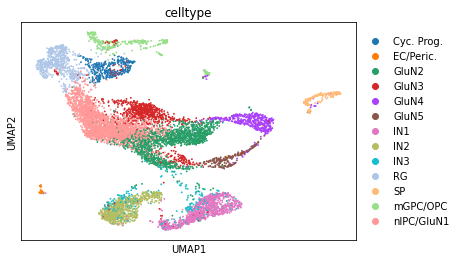

In [10]:
sc.pp.neighbors(rna, metric="cosine")
sc.tl.umap(rna)
sc.pl.umap(rna, color="celltype")


In [11]:
atac.X, atac.X.data


(<8981x296246 sparse matrix of type '<class 'numpy.float64'>'
 	with 67433468 stored elements in Compressed Sparse Row format>,
 array([1., 1., 1., ..., 1., 1., 1.]))

In [12]:
scglue.data.lsi(atac, n_components=100, n_iter=15)


/home/mnt/nzh/nzhanglab/project/shuang/miniconda3/envs/scglue2/lib/python3.8/site-packages/scglue/num.py:289: RuntimeWarning: divide by zero encountered in true_divide
  idf = X.shape[0] / X.sum(axis=0)
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/sklearn/utils/extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


In [13]:
sc.pp.neighbors(atac, use_rep="X_lsi", metric="cosine")
sc.tl.umap(atac)

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'domain' as categorical


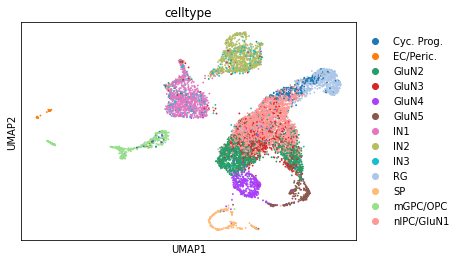

In [14]:
sc.pl.umap(atac, color="celltype")


In [15]:
rna.var.head()


,features,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std
MIR1302-2HG,MIR1302-2HG,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
FAM138A,FAM138A,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
OR4F5,OR4F5,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
AL627309.1,AL627309.1,False,NaN,0.004899,0.006212,0.996923,0.002517,0.040737
AL627309.3,AL627309.3,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000


In [16]:
rna.var_names.name = 'genes'

In [17]:
rna.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', name='genes', length=36601)

In [18]:
scglue.data.get_gene_annotation(
    rna, gtf="gencode.v40.chr_patch_hapl_scaff.annotation.gtf.gz",
    gtf_by="gene_name"
)
rna.var.loc[:, ["chrom", "chromStart", "chromEnd"]].head()

,chrom,chromStart,chromEnd
genes,,,
MIR1302-2HG,chr1,29553.0,31109.0
FAM138A,chr1,34553.0,36081.0
OR4F5,chr1,65418.0,71585.0
AL627309.1,NaN,NaN,NaN
AL627309.3,NaN,NaN,NaN


In [19]:
rna.var

,features,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,chrom,chromStart,...,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,gene_id,gene_type,hgnc_id,havana_gene,tag
genes,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,MIR1302-2HG,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,29553.0,...,.,.,.,.,.,ENSG00000243485.5,lncRNA,HGNC:52482,OTTHUMG00000000959.2,ncRNA_host
FAM138A,FAM138A,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,34553.0,...,.,.,.,.,.,ENSG00000237613.2,lncRNA,HGNC:32334,OTTHUMG00000000960.1,NaN
OR4F5,OR4F5,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,65418.0,...,.,.,.,.,.,ENSG00000186092.7,protein_coding,HGNC:14825,OTTHUMG00000001094.4,NaN
AL627309.1,AL627309.1,False,NaN,0.004899,0.006212,0.996923,0.002517,0.040737,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AL627309.3,AL627309.3,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC141272.1,AC141272.1,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC023491.2,AC023491.2,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AC007325.1,AC007325.1,False,NaN,0.000223,0.000223,0.971894,0.000122,0.008160,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = rna.var
#print(df.dropna(subset=['chrom'])["features"])

In [21]:
rna2 = rna
rna2 = rna2[:,df.dropna(subset=['chrom'])["features"]]

In [22]:
rna2.var.loc[:, ["chrom", "chromStart", "chromEnd"]]

,chrom,chromStart,chromEnd
genes,,,
MIR1302-2HG,chr1,29553.0,31109.0
FAM138A,chr1,34553.0,36081.0
OR4F5,chr1,65418.0,71585.0
OR4F29,chr1,450739.0,451678.0
OR4F16,chr1,685715.0,686654.0
...,...,...,...
MT-ND4,chrM,10759.0,12137.0
MT-ND5,chrM,12336.0,14148.0
MT-ND6,chrM,14148.0,14673.0


In [23]:
rna2.var_names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'OR4F29', 'OR4F16', 'LINC01409',
       'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C',
       ...
       'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5',
       'MT-ND6', 'MT-CYB', 'MAFIP'],
      dtype='object', name='genes', length=23582)

In [24]:
#rna2.var.loc[:, ["chrom", "chromStart", "chromEnd"]].to_csv('e18mouse/rnavar2.csv',index=False)

In [25]:
atac.var_names[:5]


Index(['chr1-10085-10398', 'chr1-180501-181806', 'chr1-191222-191738',
       'chr1-629728-630567', 'chr1-633805-634292'],
      dtype='object')

In [26]:
split = atac.var_names.str.split(r"[:-]")
atac.var["chrom"] = split.map(lambda x: x[0])
atac.var["chromStart"] = split.map(lambda x: x[1])
atac.var["chromEnd"] = split.map(lambda x: x[2])
atac.var.head()

,features,chrom,chromStart,chromEnd
chr1-10085-10398,chr1-10085-10398,chr1,10085,10398
chr1-180501-181806,chr1-180501-181806,chr1,180501,181806
chr1-191222-191738,chr1-191222-191738,chr1,191222,191738
chr1-629728-630567,chr1-629728-630567,chr1,629728,630567
chr1-633805-634292,chr1-633805-634292,chr1,633805,634292


In [27]:
graph = scglue.genomics.rna_anchored_prior_graph(rna2, atac)
graph

  0%|          | 0/23582 [00:00<?, ?it/s]

In [28]:
graph.number_of_nodes(), graph.number_of_edges()


(319828, 717870)

In [29]:
# Graph node covers all omic features
all(graph.has_node(gene) for gene in rna2.var_names), \
all(graph.has_node(peak) for peak in atac.var_names)

(True, True)

In [30]:
# Edge attributes contain weights and signs
for _, e in zip(range(5), graph.edges):
    print(f"{e}: {graph.edges[e]}")

('LINC01409', 'chr1-778091-779468', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}
('LINC01409', 'LINC01409', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('chr1-778091-779468', 'LINC01409', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'rev'}
('chr1-778091-779468', 'chr1-778091-779468', 0): {'weight': 1.0, 'sign': 1, 'type': 'loop'}
('LINC01128', 'chr1-826612-827994', 0): {'dist': 0, 'weight': 1.0, 'sign': 1, 'type': 'fwd'}


In [31]:
# Each node has a self-loop
all(graph.has_edge(gene, gene) for gene in rna2.var_names), \
all(graph.has_edge(peak, peak) for peak in atac.var_names)


(True, True)

In [32]:
# Graph is symmetric
all(graph.has_edge(j, i) for i, j, _ in graph.edges)


True

In [33]:
atac.var.head()


,features,chrom,chromStart,chromEnd,highly_variable
chr1-10085-10398,chr1-10085-10398,chr1,10085,10398,False
chr1-180501-181806,chr1-180501-181806,chr1,180501,181806,False
chr1-191222-191738,chr1-191222-191738,chr1,191222,191738,False
chr1-629728-630567,chr1-629728-630567,chr1,629728,630567,False
chr1-633805-634292,chr1-633805-634292,chr1,633805,634292,False


In [34]:
rna = rna2

In [35]:
rna.var

,features,highly_variable,highly_variable_rank,means,variances,variances_norm,mean,std,chrom,chromStart,...,thickEnd,itemRgb,blockCount,blockSizes,blockStarts,gene_id,gene_type,hgnc_id,havana_gene,tag
genes,,,,,,,,,,,,,,,,,,,,,
MIR1302-2HG,MIR1302-2HG,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,29553.0,...,.,.,.,.,.,ENSG00000243485.5,lncRNA,HGNC:52482,OTTHUMG00000000959.2,ncRNA_host
FAM138A,FAM138A,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,34553.0,...,.,.,.,.,.,ENSG00000237613.2,lncRNA,HGNC:32334,OTTHUMG00000000960.1,NaN
OR4F5,OR4F5,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,65418.0,...,.,.,.,.,.,ENSG00000186092.7,protein_coding,HGNC:14825,OTTHUMG00000001094.4,NaN
OR4F29,OR4F29,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,450739.0,...,.,.,.,.,.,ENSG00000284733.2,protein_coding,HGNC:31275,OTTHUMG00000002860.3,NaN
OR4F16,OR4F16,False,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,chr1,685715.0,...,.,.,.,.,.,ENSG00000284662.2,protein_coding,HGNC:15079,OTTHUMG00000002581.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4,MT-ND4,True,1089.0,15.405189,932.000280,2.265281,2.147511,0.860876,chrM,10759.0,...,.,.,.,.,.,ENSG00000198886.2,protein_coding,HGNC:7459,NaN,NaN
MT-ND5,MT-ND5,True,542.0,3.837991,97.315955,3.301686,0.996534,0.702496,chrM,12336.0,...,.,.,.,.,.,ENSG00000198786.2,protein_coding,HGNC:7461,NaN,NaN
MT-ND6,MT-ND6,False,NaN,0.324574,0.705887,1.040139,0.132083,0.280387,chrM,14148.0,...,.,.,.,.,.,ENSG00000198695.2,protein_coding,HGNC:7462,NaN,NaN


In [36]:
rna2.raw = None

In [37]:
rna2.raw

In [38]:
#rna.write("e18mouse/rna_preprocessed.h5ad", compression="gzip")
rna2.write("greenleaf/rna_preprocessed_v2.h5ad", compression="gzip")

atac.raw = None
atac.write("greenleaf/atac_preprocessed_v2.h5ad", compression="gzip")
nx.write_graphml(graph, "greenleaf/prior_v2.graphml.gz")

/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'chrom' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'score' as categorical
/home/stat/shuang91/gpuenv385/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. 